In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv("test.csv")

data.fillna(method='ffill', inplace=True)
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

X = data.drop(['Loan_ID', 'Credit_History'], axis=1)
y = data['Credit_History']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)

print("Classification Report:\n", classification_rep);

Accuracy: 0.7432432432432432
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        19
         1.0       0.74      1.00      0.85        55

    accuracy                           0.74        74
   macro avg       0.37      0.50      0.43        74
weighted avg       0.55      0.74      0.63        74



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


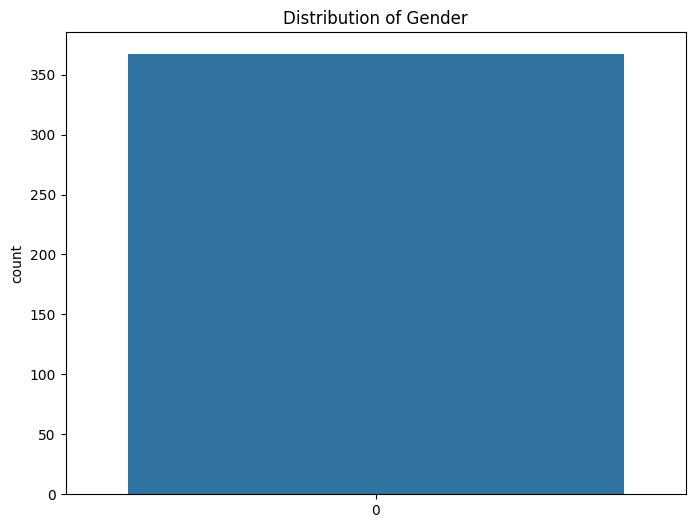

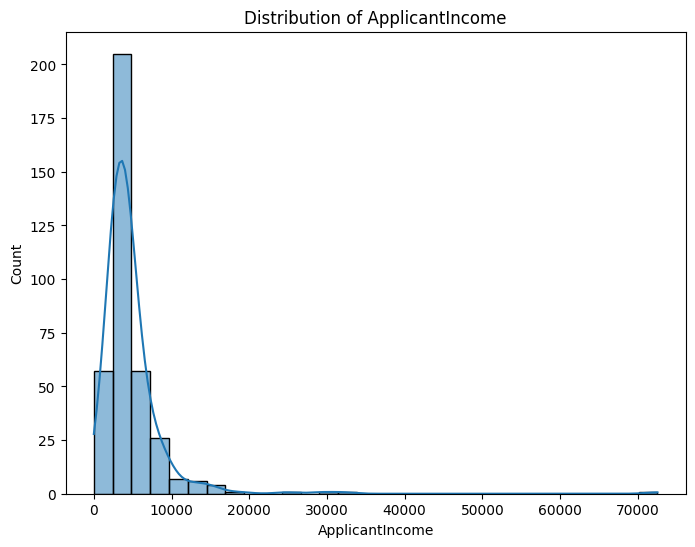

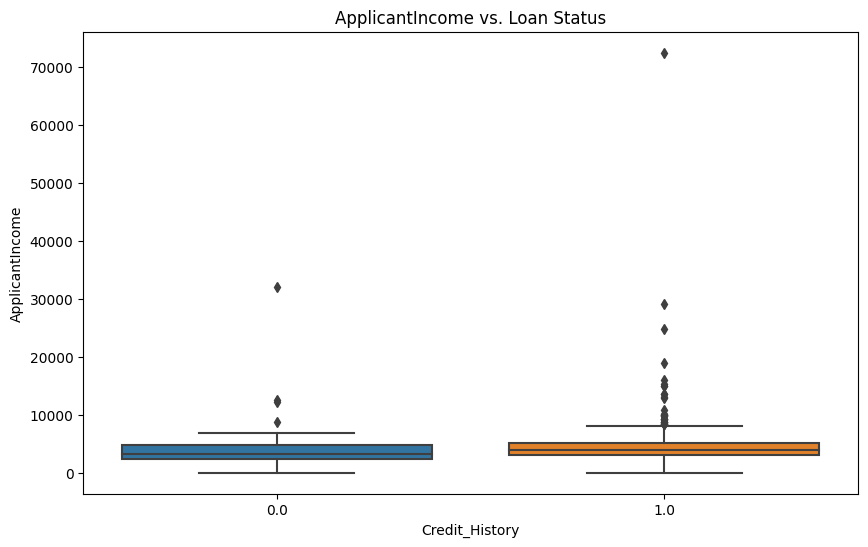

<ipython-input-6-a1f95198491d>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


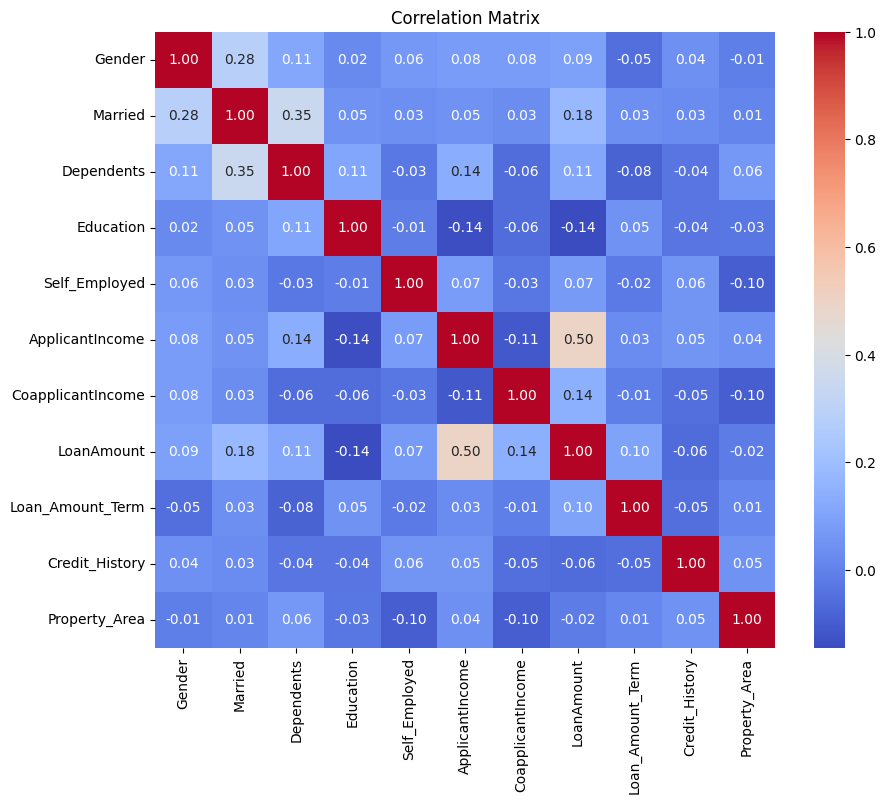

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data['Gender'])
plt.title("Distribution of Gender")
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['ApplicantIncome'], bins=30, kde=True)
plt.title("Distribution of ApplicantIncome")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_History', y='ApplicantIncome', data=data)
plt.title("ApplicantIncome vs. Loan Status")
plt.show()
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 34.5+ KB


In [ ]:
feature_importance = model.coef_[0]
absolute_feature_importance = abs(feature_importance)
feature_ranking = sorted(enumerate(absolute_feature_importance), key=lambda x: x[1], reverse=True)

In [ ]:
feature_ranking

[(5, 0.43359668657105743),
 (7, 0.26861124954591176),
 (4, 0.09569136743959863),
 (1, 0.08739406543850418),
 (3, 0.05234678735306774),
 (2, 0.026054237160034497),
 (9, 0.02577881355580447),
 (8, 0.008902068614801091),
 (0, 0.007787364129701395),
 (6, 0.004453399092274254)]

## **Preprocessing**

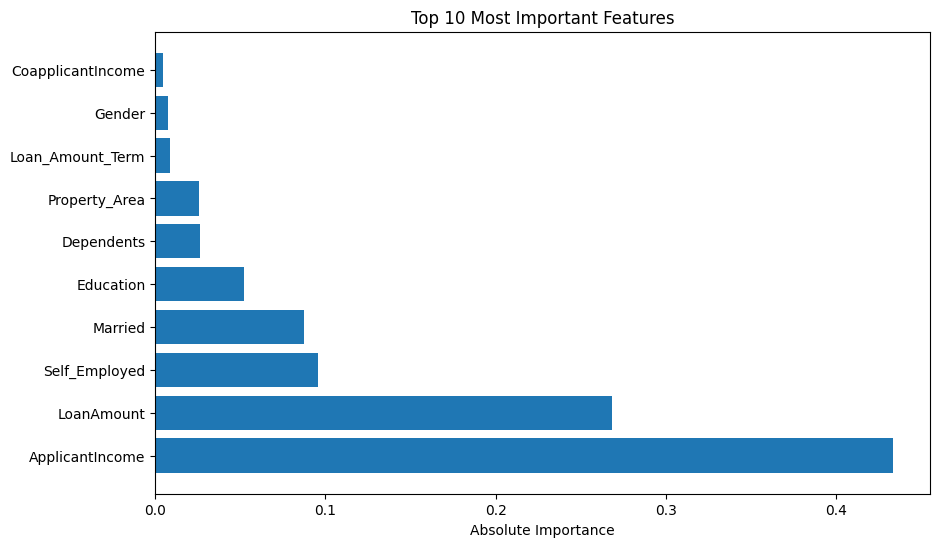

In [ ]:
feature_names = X.columns
k = 10
top_features = [feature_names[idx] for idx, importance in feature_ranking[:k]]
top_importance = [importance for idx, importance in feature_ranking[:k]]
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importance)
plt.xlabel('Absolute Importance')
plt.title('Top {} Most Important Features'.format(k))
plt.show()

In [ ]:
excluding features